# Intel Image Classification Dataset

### Importing necessary libraries

In [24]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import tensorflow as tf
from tensorflow import keras
import cv2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, Activation
from PIL import Image
from numpy import asarray 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import os

### Assigning the paths to the Variables

In [7]:
train_path="C:/Users/tejas/Desktop/Connected Autnomous Vehicles/Assignment/seg_train"
test_path = "C:/Users/tejas/Desktop/Connected Autnomous Vehicles/Assignment/seg_test"
pred_path = "C:/Users/tejas/Desktop/Connected Autnomous Vehicles/Assignment/seg_pred"

##### Here we have used ImageDataGenerator Module which helps us to rescale the images with respect to 255 pixels per image and it also helps us to generate the Labels for the images in the form of a dictionary

In [8]:
train_data = ImageDataGenerator(rescale = 1./255,shear_range = 0.2,zoom_range = 0.2)
test_data = ImageDataGenerator(rescale = 1./255)

##### Reducing the dimesnions of the image to 64 * 64 * 3 as this will ensure faster processing and training of the model. Here class_mode describes the categoricl values of the categories of the type of images.

In [9]:
train = train_data.flow_from_directory(train_path,target_size = (64, 64),class_mode = 'categorical')
test = test_data.flow_from_directory(test_path,target_size = (64, 64),class_mode = 'categorical')

Found 14034 images belonging to 6 classes.
Found 3000 images belonging to 6 classes.


#### Building a Convolutional Neural Network and training it with respect to the Train Data, this will also show us the Training Accuracy of the model.

In [10]:
model = Sequential()
model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu', input_shape = (64,64,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(Conv2D(128,kernel_size=(3,3),padding='same',activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(6,activation='softmax'))


model.compile(optimizer='Adam',loss='categorical_crossentropy',metrics='accuracy')

model.fit(train,epochs = 15)

Epoch 1/15
439/439 [==============================] - 150s 337ms/step - loss: 1.4991 - accuracy: 0.3630
Epoch 2/15
439/439 [==============================] - 154s 351ms/step - loss: 1.0182 - accuracy: 0.5883
Epoch 3/15
439/439 [==============================] - 157s 356ms/step - loss: 0.8943 - accuracy: 0.6439
Epoch 4/15
439/439 [==============================] - 159s 363ms/step - loss: 0.7840 - accuracy: 0.6988
Epoch 5/15
439/439 [==============================] - 160s 364ms/step - loss: 0.7099 - accuracy: 0.7408
Epoch 6/15
439/439 [==============================] - 161s 367ms/step - loss: 0.6224 - accuracy: 0.7792
Epoch 7/15
439/439 [==============================] - 159s 362ms/step - loss: 0.5947 - accuracy: 0.7854
Epoch 8/15
439/439 [==============================] - 159s 363ms/step - loss: 0.5464 - accuracy: 0.8069
Epoch 9/15
439/439 [==============================] - 160s 364ms/step - loss: 0.5092 - accuracy: 0.8162
Epoch 10/15
439/439 [==============================] - 160s 364m

In [27]:
model.save('Image_model.h5')

#### As the Neural Network has now been trained we will evaluate its performance with respect to the Test Data and check the Test Accuracy of the model

In [13]:
model.evaluate(test,verbose=1)

94/94 [==============================] - 7s 70ms/step - loss: 0.4910 - accuracy: 0.8340


[0.49103549122810364, 0.8339999914169312]

#### Changing directories so as to we dont have to give a long path always. Instead we will just give the image name and run the Predictions

In [14]:
path = os.chdir('C:\\Users\\tejas\\Desktop\\Connected Autnomous Vehicles\\Assignment\\seg_pred')
path = os.getcwd()
path

'C:\\Users\\tejas\\Desktop\\Connected Autnomous Vehicles\\Assignment\\seg_pred'

### Making Predictions

#### Displaying the Image on which we are going to make the Predictions 

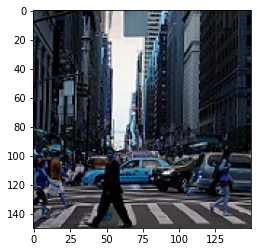

In [15]:
image_path = '2685.jpg'
image = cv2.imread(image_path,-1)
plt.imshow(image)
plt.show()

#### Loading the image and setting the height and width of the image, then converting it to an array followed by expanding the dimesnions of the particular array and then making predictions over the Image. 

In [18]:
pred_image = image.load_img(image_path, target_size = (64, 64))
pred_image = image.img_to_array(pred_image)
pred_image = np.expand_dims(pred_image, axis = 0)
predictions = model.predict(pred_image)

In [19]:
print(predictions)

[[1.0125125e-32 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  1.0000000e+00]]


In [20]:
categories=train.class_indices
categories=['building','forest','glacier','mountain','sea','street']

#### Dispaying the Predictions mentioning what is that particular Image

In [21]:
category = categories[np.argmax(predictions)]
print('The Image is of a ' + category)

The Image is of a street


### Making some more Predictions 

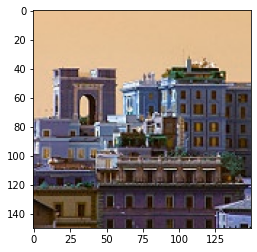

In [22]:
image_path = '2577.jpg'
image = cv2.imread(image_path,-1)
plt.imshow(image)
plt.show()

In [25]:
pred_image = image.load_img('2577.jpg', target_size = (64, 64))
pred_image = image.img_to_array(pred_image)
pred_image = np.expand_dims(pred_image, axis = 0)
predictions = model.predict(pred_image)

In [26]:
categories=train.class_indices
categories=['building','forest','glacier','mountain','sea','street']
category = categories[np.argmax(predictions)]
print('The Image is of a ' + category)

The Image is of a building
